# Compute Basic Statistics for Each Skill
Compute basic statistics (mean, median, mode) for each skill

In [21]:
import pandas as pd
data =  pd.read_csv('clean_data.csv')
data.columns

Index(['Unnamed: 0', 'gender', 'year', 'cgpa', 'university_name',
       'Critical Thinking', 'Problem Solving', 'Team Work',
       'Communication Skill', 'Software Engineering Principal',
       'Data Structure & Algorithm', 'Database Management',
       'Data Analysis skill', 'Web Developing Skill',
       'Understanding of computer architecture & System',
       'Understanding Operating System', 'Networking Concept',
       'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill',
       'Research Skill', 'publication', 'project', 'Influencing Factor',
       'Prefer Job'],
      dtype='object')

In [22]:
import pandas as pd
skills_df = pd.read_csv('Skills_list.csv')
skills = skills_df.iloc[:, 0].tolist()
skills

['cgpa',
 'Critical Thinking',
 'Problem Solving',
 'Team Work',
 'Communication Skill',
 'Software Engineering Principal',
 'Data Structure & Algorithm',
 'Database Management',
 'Data Analysis skill',
 'Web Developing Skill',
 'Understanding of computer architecture & System',
 'Understanding Operating System',
 'Networking Concept',
 'Cyber Security Skill',
 'Machine Learning Skill',
 'Robotics Skill',
 'Research Skill',
 'publication',
 'project']

In [23]:
statistics = {}
for skill in skills:
    if skill in data.columns:
        statistics[skill] = {
            'mean': data[skill].mean(),
            'median': data[skill].median(),
            'mode': data[skill].mode()[0] if not data[skill].mode().empty else 'No mode'  # handle empty mode
        }
    else:
        print(f"Column '{skill}' not found in the DataFrame")


data = {
    'Skill Name': [],
    'Mean': [],
    'Median': [],
    'Mode': []
}
Stat = pd.DataFrame(data)

        
        
for skill, val in statistics.items():
    Mean=val['mean']
    Median=val['median']
    Mode=val['mode']
    new_row = {'Skill Name': skill, 'Mean':Mean, 'Median': Median, 'Mode': Mode}
    
    Stat = pd.concat([Stat,pd.DataFrame([new_row])], ignore_index=True)
    #print(f"{skill}: Mean = {Mean}, Median = {Median}, Mode = {Mode}")

    
Stat

,Skill Name,Mean,Median,Mode
0,cgpa,3.324403,3.365,3.0
1,Critical Thinking,2.008547,2.000,2.0
2,Problem Solving,2.113248,2.000,2.0
3,Team Work,2.282051,2.000,2.0
4,Communication Skill,2.121795,2.000,2.0
5,Software Engineering Principal,1.698718,2.000,2.0
6,Data Structure & Algorithm,1.980769,2.000,2.0
7,Database Management,1.805556,2.000,2.0
8,Data Analysis skill,1.709402,2.000,2.0
9,Web Developing Skill,1.726496,2.000,1.0


# Identify the Distribution of Preferred Jobs Among Students

In [24]:
import pandas as pd
csv1 = pd.read_csv("clean_data.csv", usecols=["Prefer Job"])
data = pd.DataFrame(csv1)


# Split the job preferences by commas and create a flat list of jobs
all_jobs = data["Prefer Job"].str.split(",").explode().str.strip()

# Get the unique jobs by removing duplicates
jobs = all_jobs[all_jobs != ""].unique().tolist()


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Prefer Job'].apply(lambda x: is_job_preferred(x, job))


for job in jobs:
    print(f"Students preferring '{job}':")
    print(data[data[job] == True].index.tolist())
    print("\n")
    
    


Students preferring 'Software Development':
[0, 2, 3, 4, 5, 6, 11, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 32, 34, 35, 37, 38, 39, 43, 44, 47, 48, 49, 50, 53, 54, 55, 56, 58, 60, 63, 64, 66, 67, 70, 71, 73, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 98, 101, 105, 106, 107, 110, 111, 113, 114, 115, 116, 117, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 142, 145, 146, 148, 150, 152, 153, 154, 155, 156, 158, 159, 160, 163, 165, 168, 169, 170, 172, 173, 175, 176, 177, 180, 182, 183, 185, 186, 191, 192, 193, 194, 196, 197, 198, 199, 202, 203, 204, 205, 207, 209, 212, 213, 215, 216, 219, 220, 222, 226, 227, 228, 229, 230, 233, 234, 235, 236, 239, 240, 241, 242, 243, 244, 247, 250, 252, 253, 257, 259, 260, 262, 263, 264, 267, 268, 271, 274, 276, 277, 281, 283, 284, 286, 287, 288, 290, 291, 293, 298, 303, 306, 315, 322, 328, 333, 336, 353, 355, 359, 360, 361, 363, 365, 369, 370, 374, 376, 377, 379, 386, 387, 388, 389, 393, 395, 401, 402, 408

In [25]:
job_counts = {job: data[job].sum() for job in jobs}


job_counts_df = pd.DataFrame(list(job_counts.items()), columns=['Job', 'Count'])
job_counts_df

,Job,Count
0,Software Development,228
1,Teaching,51
2,ML/AI Engineer,73
3,Abroad,81
4,Data Analysis,71
5,Database Administration,38
6,Business,31
7,BCS,45
8,Bank Job,45
9,Other,22


# Plot Jobs Count

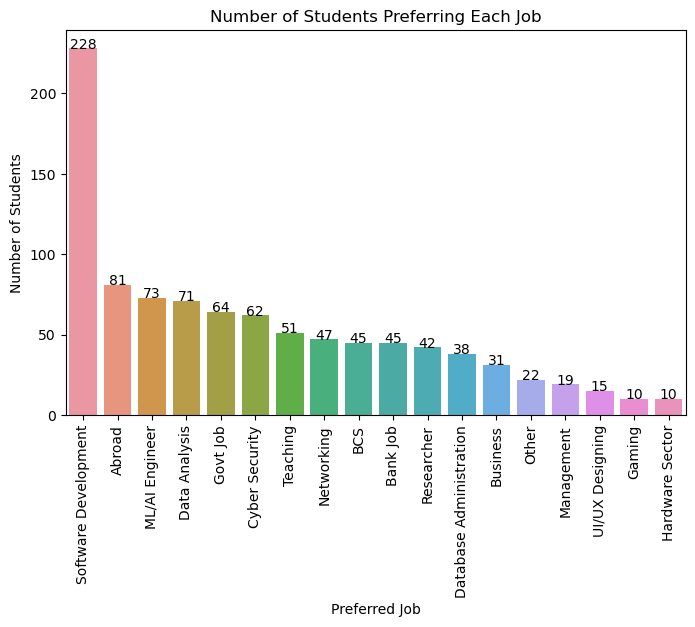

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

job_counts_df = job_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)



plt.figure(figsize=(8, 5))

ax=sns.barplot(x='Job', y='Count', data=job_counts_df)

#for print number on each column
for index, row in job_counts_df.iterrows():
    ax.text(index, row['Count'], row['Count'], ha="center")

plt.xticks(rotation=90)
plt.xlabel('Preferred Job')
plt.ylabel('Number of Students')
plt.title('Number of Students Preferring Each Job')
plt.show()


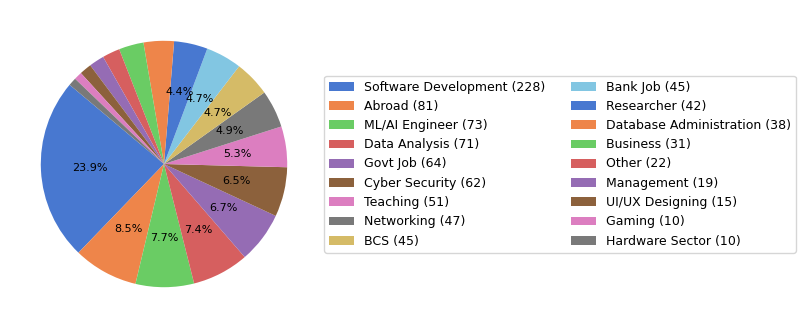

In [27]:
# Define colors using a seaborn palette
colors = sns.color_palette('muted', len(job_counts_df))

# Calculate percentages
total = job_counts_df['Count'].sum()
percentages = (job_counts_df['Count'] / total) * 100

# Create the pie chart
plt.figure(figsize=(6, 4))  # Adjust size
wedges, texts, autotexts = plt.pie(
    job_counts_df['Count'],
    labels=None,  # Hide pie chart labels (handled in legend)
    autopct=lambda p: f'{p:.1f}%' if p >= 4 else '',  # Show only >=8%
    startangle=140,
    colors=colors,
    textprops={'fontsize': 8}  # Make text smaller
)

# Add a legend on the right with two columns
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    labels=[f'{job} ({count})' for job, count in zip(job_counts_df['Job'], job_counts_df['Count'])],
    fontsize=9,
    ncol=2  # Two-column legend
)

#plt.title('Preferred Jobs Distribution', fontsize=10)  # Title
plt.savefig('jobs_distribution.jpg', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()




In [37]:
job_count = job_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
job_count = job_count.rename(columns={'Count': 'Preferred'})
total_count = len(data)

# Add a new column for Not Preferred counts
job_count['Not Preferred'] = total_count - job_count['Preferred']
job_count


,Job,Preferred,Not Preferred
0,Software Development,228,240
1,Abroad,81,387
2,ML/AI Engineer,73,395
3,Data Analysis,71,397
4,Govt Job,64,404
5,Cyber Security,62,406
6,Teaching,51,417
7,Networking,47,421
8,Bank Job,45,423
9,BCS,45,423


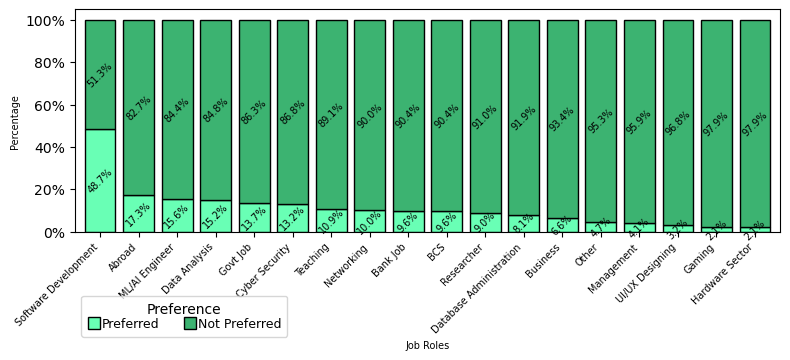

In [94]:
job_count_percentage = job_count.set_index('Job')
job_count_percentage = job_count_percentage.div(job_count_percentage.sum(axis=1), axis=0) * 100

ax = job_count_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=['#69ffb5', 'mediumseagreen'],
    edgecolor='black',
    width=0.8  # Reduce the width of each bar
)

# Customize the plot
#plt.title('Preferred vs Not Preferred Jobs (Percentage)', fontsize=14)
plt.xlabel('Job Roles', fontsize=7)
plt.ylabel('Percentage', fontsize=7)
plt.xticks(rotation=45, ha='right', fontsize=7)

formatter = FuncFormatter(lambda x, _: f'{int(x)}%')
ax.yaxis.set_major_formatter(formatter)

# Add vertical percentage labels on the bars
for i, (index, row) in enumerate(job_count_percentage.iterrows()):
    cumulative_height = 0
    for col in job_count_percentage.columns:
        value = row[col]
        if value > 0:  # Add label if percentage is greater than 0
            plt.text(i, cumulative_height + value / 2, f'{value:.1f}%', 
                     ha='center', va='center', fontsize=7,rotation=45)  # Set rotation to 90 degrees
        cumulative_height += value

plt.legend(title='Preference', fontsize=9, 
           bbox_to_anchor=(0, -0.5), loc='lower left', ncol=2,
           frameon=True, borderpad=0.5, 
           handlelength=1,  # Adjust length of the color boxes
           handleheight=1,  # Adjust height of the color boxes
           handletextpad=0.1,  # Adjust padding between the color boxes and text
           labelspacing=0.1)  

# Adjust layout
plt.tight_layout()

plt.savefig('jobs_distribution.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()

# prefer Job analysis with (Association Rules)

In [96]:
from mlxtend.frequent_patterns import apriori, association_rules

binary_data = data[jobs].applymap(lambda x: 1 if x else 0)

min_support = 20 / len(binary_data)

frequent_itemsets = apriori(binary_data, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules['support']=rules['support']*len(binary_data)
rules= rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules.to_csv('rules.csv')

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
skills1 = skills

# Plot Histograms of different skills

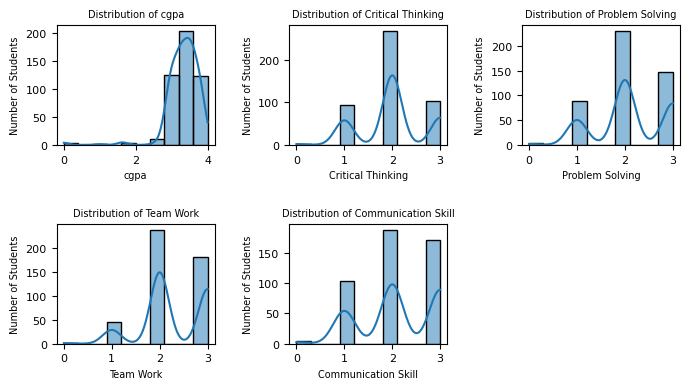

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('clean_data.csv')

# List of columns to plot (first 5 items)
columns_to_plot = skills[:5]

# Number of columns and rows for the subplot grid
num_cols = 3
num_rows = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 4))
axes = axes.flatten()

# Plot each histogram in the grid
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=10, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=7)
    axes[i].set_xlabel(column, fontsize=7)
    axes[i].set_ylabel('Number of Students', fontsize=7)
    axes[i].tick_params(axis='both', labelsize=8)

# Remove any empty subplots (if fewer plots than grid spaces)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make subplots evenly spaced and justified
plt.tight_layout(w_pad=2, h_pad=2)  # Adjust padding between subplots
plt.savefig('softSkills_distribution.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()



In [11]:
dff = data
dff.rename(columns={'Understanding of computer architecture & System': 'Computer Architecture'}, inplace=True)
dff.columns

Index(['Unnamed: 0', 'gender', 'year', 'cgpa', 'university_name',
       'Critical Thinking', 'Problem Solving', 'Team Work',
       'Communication Skill', 'Software Engineering Principal',
       'Data Structure & Algorithm', 'Database Management',
       'Data Analysis skill', 'Web Developing Skill', 'Computer Architecture',
       'Understanding Operating System', 'Networking Concept',
       'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill',
       'Research Skill', 'publication', 'project', 'Influencing Factor',
       'Prefer Job'],
      dtype='object')

['Software Engineering Principal', 'Data Structure & Algorithm', 'Database Management', 'Data Analysis skill', 'Web Developing Skill', 'Computer Architecture', 'Understanding Operating System', 'Networking Concept', 'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill', 'Research Skill']


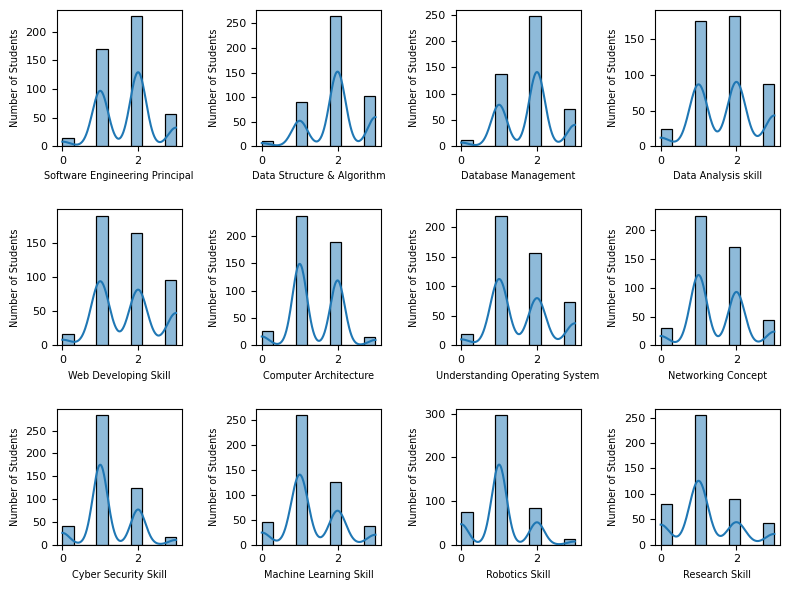

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#data = pd.read_csv('clean_data.csv')

# List of columns to plot (first 5 items)

columns_to_plot = skills[5:17]

columns_to_plot[5] = 'Computer Architecture'
print(columns_to_plot)
num_cols = 4
num_rows = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
axes = axes.flatten()

# Plot each histogram in the grid
for i, column in enumerate(columns_to_plot):
    sns.histplot(dff[column], bins=10, kde=True, ax=axes[i], edgecolor='black')
    #axes[i].set_title(f'Dist. of {column}', fontsize=7)
    axes[i].set_xlabel(column, fontsize=7)
    axes[i].set_ylabel('Number of Students', fontsize=7)
    axes[i].tick_params(axis='both', labelsize=8)

# Remove any empty subplots (if fewer plots than grid spaces)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make subplots evenly spaced and justified
plt.tight_layout(w_pad=2, h_pad=2)  # Adjust padding between subplots
plt.savefig('academic_skill.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()


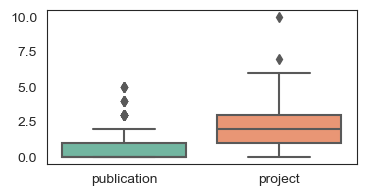

In [154]:
columns_to_plot = skills[17:19]

plt.figure(figsize=(4, 2))
sns.boxplot(data=data[columns_to_plot],palette="Set2")
#plt.title('Box Plot of Skills and CGPA')
#plt.xticks(rotation=90)
plt.gca().grid(False)
plt.savefig('project and Publication.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()

# Correlation Analysis

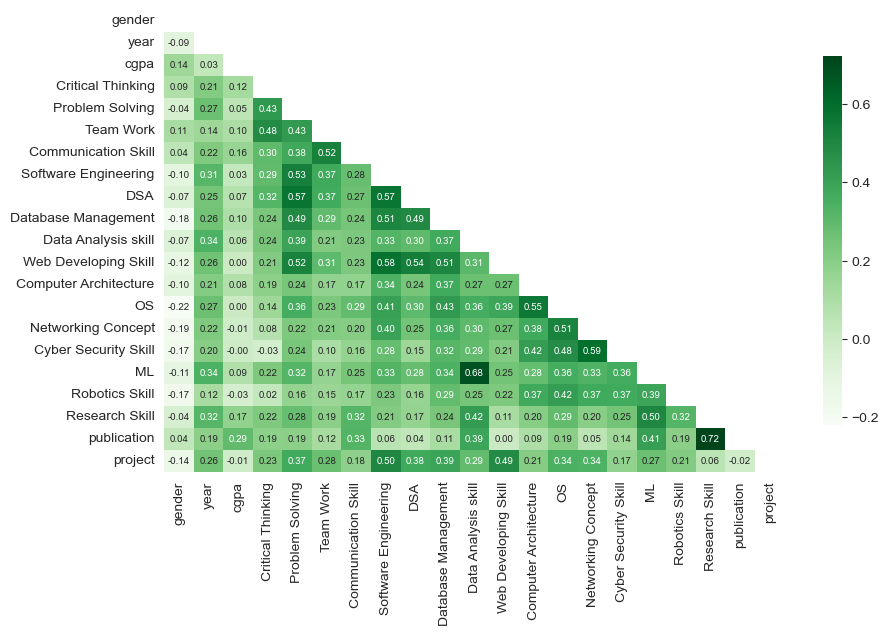

Skills most positively correlated with CGPA:
publication            0.292799
Research Skill         0.173110
Communication Skill    0.157766
gender                 0.141194
Critical Thinking      0.121929
Name: cgpa, dtype: float64

Skills most negatively correlated with CGPA:
Web Developing Skill    0.002196
Cyber Security Skill   -0.004255
Networking Concept     -0.011740
project                -0.011876
Robotics Skill         -0.034501
Name: cgpa, dtype: float64


In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('clean_data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.rename(columns={'Software Engineering Principal': 'Software Engineering'}, inplace=True)
data.rename(columns={'Data Structure & Algorithm': 'DSA'}, inplace=True)
data.rename(columns={'Understanding of computer architecture & System': 'Computer Architecture'}, inplace=True)
data.rename(columns={'Machine Learning Skill': 'ML'}, inplace=True)
data.rename(columns={'Understanding Operating System': 'OS'}, inplace=True)

numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='Blues', 
            fmt='.2f',
            annot_kws={'fontsize': 7},  # Reduce annotation font size
            cbar_kws={'shrink': 0.8}
           )
plt.savefig('skills_heatmap.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()

# filtered_corr,
#     mask=mask,
#     cmap="Reds",
#     annot=True,
#     fmt=".2f",
#     square=True,
#     cbar_kws={"shrink": 0.8},
#     linewidths=0.5

# Identify skills most correlated with CGPA
cgpa_correlations = correlation_matrix['cgpa'].drop('cgpa').sort_values(ascending=False)
print("Skills most positively correlated with CGPA:")
print(cgpa_correlations.head())
print("\nSkills most negatively correlated with CGPA:")
print(cgpa_correlations.tail())


In [11]:
# Display the correlation matrix DataFrame
correlation_matrix


,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
cgpa,1.000000,0.121929,0.050917,0.101585,0.157766,0.026326,0.070480,0.096044,0.056213,0.002196,0.083930,0.003587,-0.011740,-0.004255,0.085098,-0.034501,0.173110,0.292799,-0.011876
Critical Thinking,0.121929,1.000000,0.433644,0.483976,0.298916,0.294607,0.323226,0.235451,0.236521,0.212883,0.188124,0.142261,0.076537,-0.028867,0.222196,0.022826,0.219801,0.187591,0.229103
Problem Solving,0.050917,0.433644,1.000000,0.429718,0.377809,0.531520,0.573534,0.492631,0.394891,0.517539,0.242397,0.358418,0.222337,0.241380,0.324617,0.164187,0.280328,0.192000,0.369912
Team Work,0.101585,0.483976,0.429718,1.000000,0.522070,0.373973,0.371204,0.291918,0.212077,0.306200,0.171493,0.231960,0.207833,0.103842,0.165968,0.149907,0.189337,0.116085,0.275977
Communication Skill,0.157766,0.298916,0.377809,0.522070,1.000000,0.277995,0.268373,0.244078,0.226369,0.226272,0.172833,0.288897,0.203552,0.163278,0.245330,0.165550,0.322636,0.327599,0.181365
Software Engineering Principal,0.026326,0.294607,0.531520,0.373973,0.277995,1.000000,0.571043,0.510952,0.325275,0.579211,0.342750,0.406944,0.398898,0.284325,0.329874,0.226734,0.211629,0.058558,0.500240
Data Structure & Algorithm,0.070480,0.323226,0.573534,0.371204,0.268373,0.571043,1.000000,0.492517,0.299979,0.536785,0.243752,0.302692,0.253051,0.146098,0.281923,0.161572,0.165940,0.039130,0.375729
Database Management,0.096044,0.235451,0.492631,0.291918,0.244078,0.510952,0.492517,1.000000,0.371486,0.507115,0.371966,0.429959,0.358766,0.318845,0.340351,0.289116,0.236447,0.112869,0.393681
Data Analysis skill,0.056213,0.236521,0.394891,0.212077,0.226369,0.325275,0.299979,0.371486,1.000000,0.306849,0.269635,0.360096,0.300398,0.292989,0.678302,0.246626,0.424166,0.390958,0.291249
Web Developing Skill,0.002196,0.212883,0.517539,0.306200,0.226272,0.579211,0.536785,0.507115,0.306849,1.000000,0.272073,0.386332,0.269550,0.210782,0.254594,0.224800,0.109955,0.003586,0.485380


# Skill Clustering

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('clean_data.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[skills])
data_scaled

array([[ 1.14617069, -0.01276036,  1.23571573, ...,  0.95782171,
         0.44257147, -0.29017543],
       [-1.83264829, -1.50572194, -1.55134432, ..., -0.2471798 ,
        -0.55802489, -1.55935393],
       [ 0.03467107, -0.01276036, -0.1578143 , ..., -0.2471798 ,
        -0.55802489, -0.29017543],
       ...,
       [ 0.8349508 , -0.01276036,  1.23571573, ...,  2.16282322,
         2.44376418,  0.34441382],
       [-0.0542489 , -0.01276036, -0.1578143 , ..., -0.2471798 ,
        -0.55802489, -0.29017543],
       [ 1.03502073, -0.01276036,  1.23571573, ..., -0.2471798 ,
        -0.55802489,  0.97900308]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

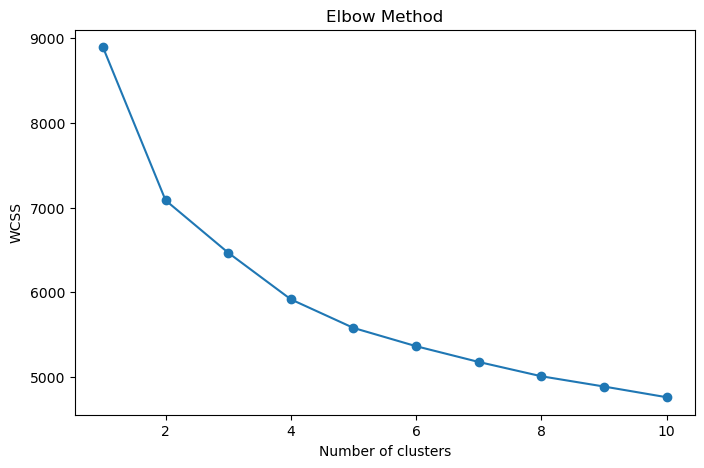

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
# Fit the K-means algorithm with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
# Calculate the mean skill ratings for each cluster
cluster_profiles = data.groupby('Cluster')[skills].mean()

print("Cluster Profiles:")
cluster_profiles


Cluster Profiles:


,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
Cluster,,,,,,,,,,,,,,,,,,,
0,3.387243,2.297468,2.518987,2.525316,2.468354,2.145570,2.322785,2.208861,2.329114,2.151899,1.803797,2.202532,1.924051,1.639241,1.993671,1.506329,1.791139,1.196203,3.221519
1,3.200920,1.536585,1.357724,1.723577,1.544715,1.024390,1.284553,1.121951,1.170732,1.040650,0.975610,1.073171,0.983740,0.951220,0.821138,0.764228,0.772358,0.219512,1.463415
2,3.352531,2.074866,2.267380,2.443850,2.208556,1.764706,2.149733,1.914439,1.540107,1.818182,1.379679,1.443850,1.449198,1.117647,1.106952,0.893048,0.994652,0.240642,2.465241


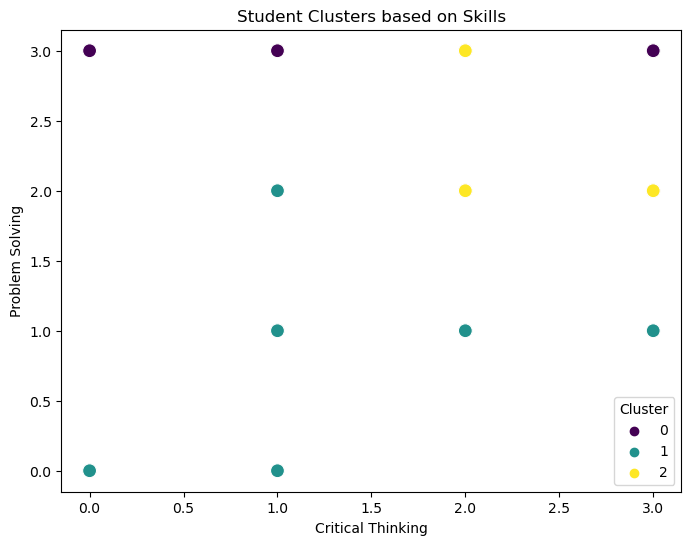

In [16]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Critical Thinking', y='Problem Solving', hue='Cluster', palette='viridis', s=100)
plt.title('Student Clusters based on Skills')
plt.xlabel('Critical Thinking')
plt.ylabel('Problem Solving')
plt.show()


# Influencing Factors Analysis


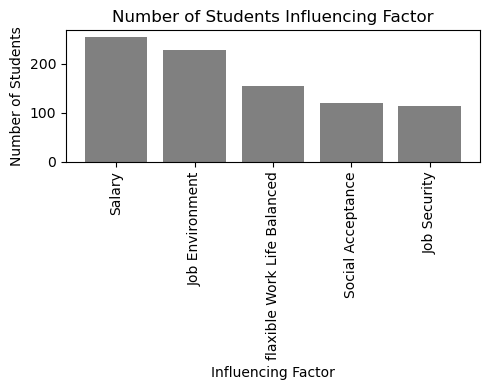

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

csv1 = pd.read_csv("clean_data.csv", usecols=["Influencing Factor"])
data = pd.DataFrame(csv1)
data["Influencing Factor"].fillna("", inplace=True)
jobs = ['Social Acceptance', 'Job Security', 'Job Environment', 'Salary', 'flaxible Work Life Balanced']


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Influencing Factor'].apply(lambda x: is_job_preferred(x, job))


job_sum = {}
for job in jobs:
    job_sum[job] = data[job].sum()

job_counts = pd.DataFrame(list(job_sum.items()), columns=['Job', 'Count'])


job_counts = job_counts.sort_values(by='Count', ascending=False)

#print(job_counts)



# Plotting the bar plot
plt.figure(figsize=(5, 4))
plt.bar(job_counts['Job'], job_counts['Count'], color='gray')
plt.xlabel('Influencing Factor')
plt.ylabel('Number of Students')
plt.title('Number of Students Influencing Factor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Influencing Factors based on- prefered job

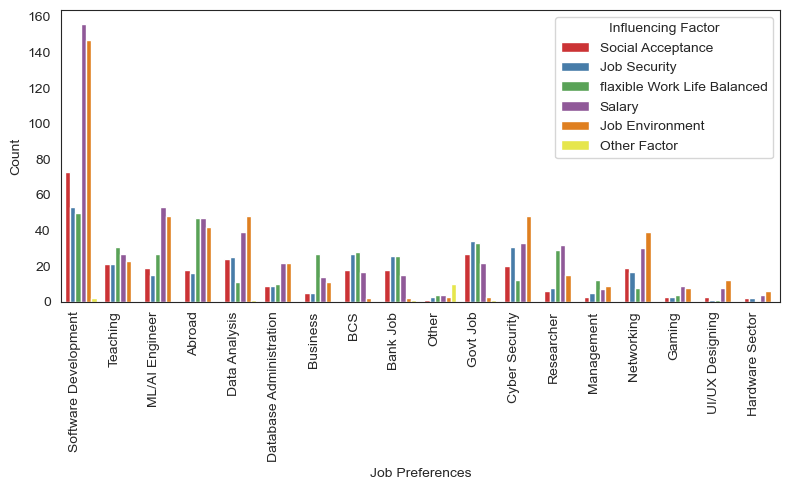

In [119]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'clean_data.csv'  # Change this to your file path

# Read the relevant columns and split the comma-separated values into lists
data = pd.read_csv(file_path, usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Flatten the data to have one row per (influencing factor, job preference)
rows = []
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        for job in row['Prefer Job']:
            rows.append((factor.strip(), job.strip()))

# Create a new DataFrame from the flattened data
flat_data = pd.DataFrame(rows, columns=["Influencing Factor", "Prefer Job"])

# Plot the data
plt.figure(figsize=(8, 5))
sns.countplot(data=flat_data, x='Prefer Job', hue='Influencing Factor', palette='Set1')
#plt.title('Job Preferences by Influencing Factors')
plt.xlabel('Job Preferences')
plt.ylabel('Count')
plt.legend(title='Influencing Factor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('influencing factors.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()


In [19]:
import pandas as pd
from collections import Counter

# Define the function to get job preferences based on influencing factor indices
def fun(indices, factor, data1):
    v = []
    for index in indices:
        v.extend(data1.at[index, 'Prefer Job'])
    counts = Counter(v)
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_counts, columns=['Preferred Job', factor])

# Read the CSV file and select the necessary columns
data = pd.read_csv("rrr_data.csv", usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Initialize dictionary to store indices for different factors
indices = {
    'Salary': [],
    'Job Environment': [],
    'flaxible Work Life Balanced': [],
    'Job Security': [],
    'Social Acceptance': [],
    'other': []
}

# Populate the lists based on the influencing factors
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        factor = factor.strip()
        if factor in indices:
            indices[factor].append(index)

# Create DataFrames for each influencing factor and merge them
merged_df = pd.DataFrame({'Preferred Job': []})
for factor, idx_list in indices.items():
    df = fun(idx_list, factor, data)
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Preferred Job', how='outer')

# Fill NaN values with 0 (if needed)
merged_df = merged_df.fillna(0)
merged_df['other'] = merged_df['other'].astype('int16')
# Display the merged DataFrame
merged_df


,Preferred Job,Salary,Job Environment,flaxible Work Life Balanced,Job Security,Social Acceptance,other
0,Software Development,84,75,76,89,66,15
1,Abroad,40,37,34,33,22,0
2,ML/AI Engineer,28,25,29,26,16,0
3,Data Analysis,23,28,17,35,20,1
4,Teaching,22,26,21,19,18,0
5,Govt Job,22,14,20,30,21,0
6,Cyber Security,19,27,16,33,20,0
7,Bank Job,18,15,16,20,16,0
8,Business,16,12,15,6,5,0
9,BCS,15,11,14,18,15,0


# Factor analysis

In [20]:
import pandas as pd

# Load the data
csv1 = pd.read_csv("clean_data.csv")
df = pd.DataFrame(csv1)



columns_to_drop = ['Unnamed: 0', 'gender','university_name','year']  
df = df.drop(columns_to_drop, axis=1)



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

df

ValueError: setting an array element with a sequence.

In [21]:
Analytical Skills:
    
Critical Thinking
Problem Solving
Data Analysis skill
Research Skill


Communication Skill:
    
Public Speaking
Professional Writing
Team Work
Leadership & Professional Attitude
Mass Communication


Technical Skill:
    
cgpa
Software Engineering Principal
Data Structure & Algorithm
Database Management
Web Developing Skill
Machine Learning Skill
Robotics Skill
Cyber Security Skill
publication
project


Systems Knowledge:
    
Understanding of computer architecture & System
Understanding Operating System
Networking Concept

SyntaxError: invalid syntax (2193265678.py, line 1)

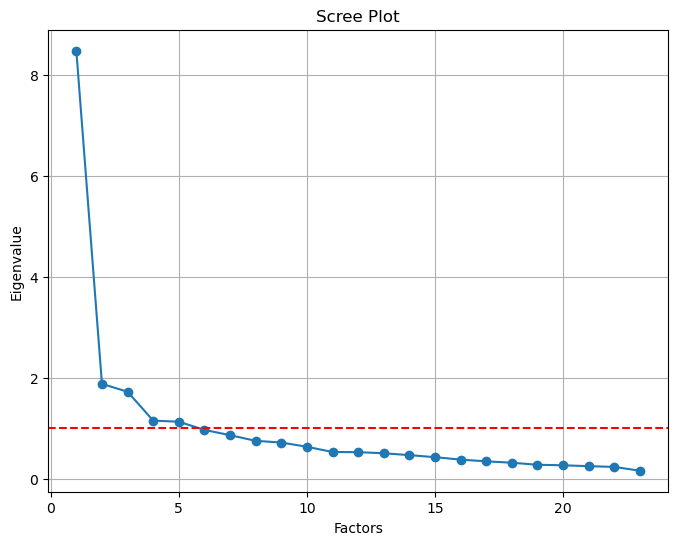

Factor Loadings:
                                                  Factor 1  Factor 2  Factor 3  \
Unnamed: 0                                      -0.054379  0.055448  0.102209   
cgpa                                            -0.136777  0.008713  0.115518   
Critical Thinking                                0.025289  0.378567  0.575463   
Problem Solving                                  0.174746  0.212964  0.657719   
Public Speaking                                  0.119503  0.558869  0.068214   
Professional Writing                             0.258019  0.465092  0.034181   
Team Work                                        0.150520  0.676803  0.351549   
Leadership & Professional Attitude               0.170830  0.767419  0.224580   
Mass Communication                               0.196966  0.608905  0.047120   
Software Engineering Principal                   0.504253  0.172506  0.436745   
Data Structure & Algorithm                       0.268821  0.034254  0.714860   
Database M

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Unnamed: 0,-0.054379,0.055448,0.102209,0.064333,0.121578
cgpa,-0.136777,0.008713,0.115518,0.012637,0.054772
Critical Thinking,0.025289,0.378567,0.575463,0.034133,0.069041
Problem Solving,0.174746,0.212964,0.657719,0.108234,0.095276
Public Speaking,0.119503,0.558869,0.068214,0.097792,0.160478
Professional Writing,0.258019,0.465092,0.034181,0.379403,0.242350
Team Work,0.150520,0.676803,0.351549,0.096937,0.023583
Leadership & Professional Attitude,0.170830,0.767419,0.224580,0.139377,0.004898
Mass Communication,0.196966,0.608905,0.047120,0.208571,0.127399
Software Engineering Principal,0.504253,0.172506,0.436745,0.157361,0.264414


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('skills.csv')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform initial factor analysis
fa = FactorAnalyzer(n_factors=20, rotation=None)
fa.fit(scaled_data)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Based on the scree plot, decide on the number of factors (e.g., 5)
n_factors = 5

# Perform EFA with Varimax rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_data)

# Get factor loadings
loadings = fa.loadings_

# Create a DataFrame for the factor loadings
loadings_df = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
print("Factor Loadings:\n", loadings_df)

# Interpretation of factors with naming
print("\nInterpretation of Factors and Naming:")
factor_names = ["Analytical Skills", "Communication & Leadership Skills", "Technical Skills", "Systems & Research Skills", "Advanced Technical Skills"]
for i in range(n_factors):
    factor_skills = loadings_df.iloc[:, i].nlargest(5).index.tolist()
    factor_description = f"Factor {i+1} ({factor_names[i]}) is associated with: {', '.join(factor_skills)}"
    print(factor_description)

# Optional: Calculate Cronbach's alpha for each factor
def calculate_cronbach_alpha(itemscores):
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return nitems / (nitems - 1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

print("\nCronbach's Alpha for each factor:")
for i in range(n_factors):
    factor_items = data.loc[:, loadings_df.iloc[:, i].nlargest(5).index]
    alpha = calculate_cronbach_alpha(factor_items)
    print(f"Cronbach's Alpha for Factor {i+1} ({factor_names[i]}): {alpha:.2f}")

# Display the factor loadings DataFrame
loadings_df
